# Scan Images

Execute this commands
- ```conda install -c pytorch pytorch torchvision torchaudio```
- ```pip install easyocr```
- ```pip install pymupdf```

Total area: 71.66 percent


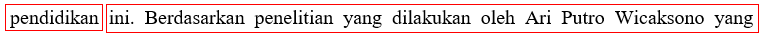

Total area: 54.98 percent


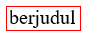

Total area: 73.13 percent


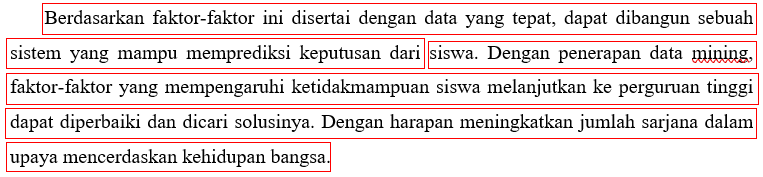

Total area: 66.48 percent


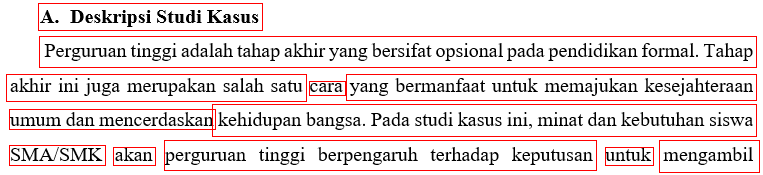

Total area: 3.0 percent


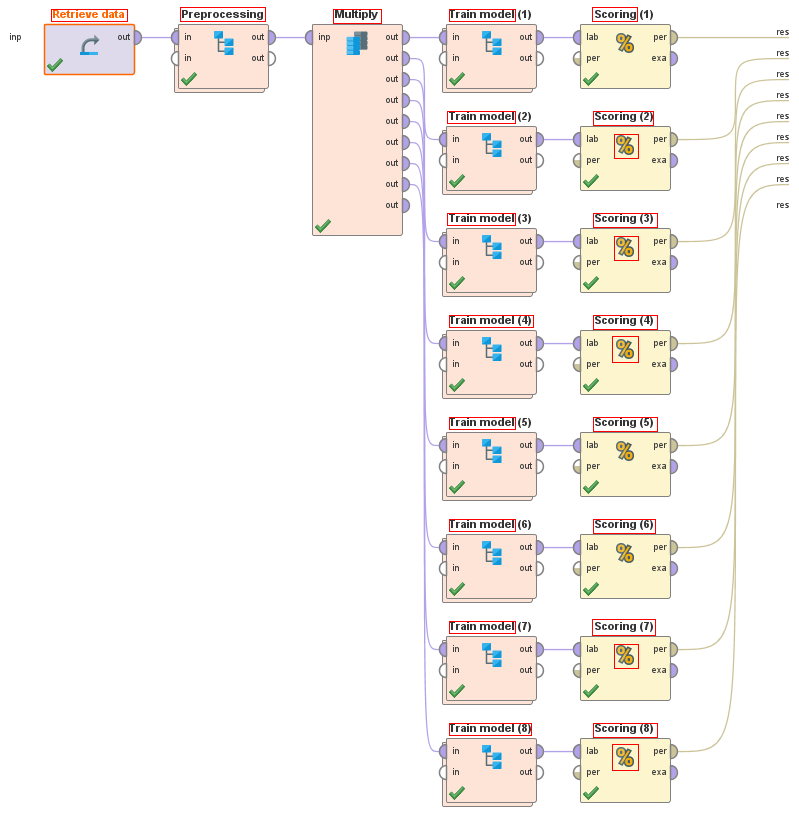

Total area: 6.73 percent


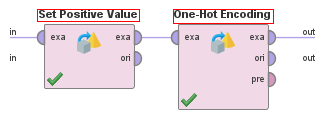

Total area: 1.58 percent


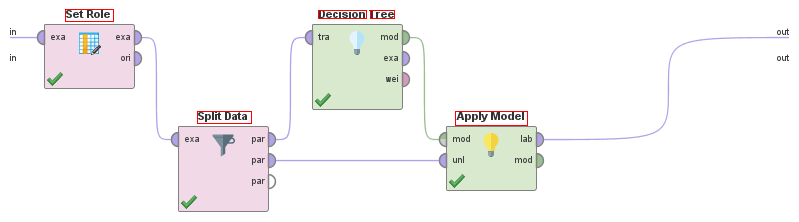

Total area: 10.37 percent


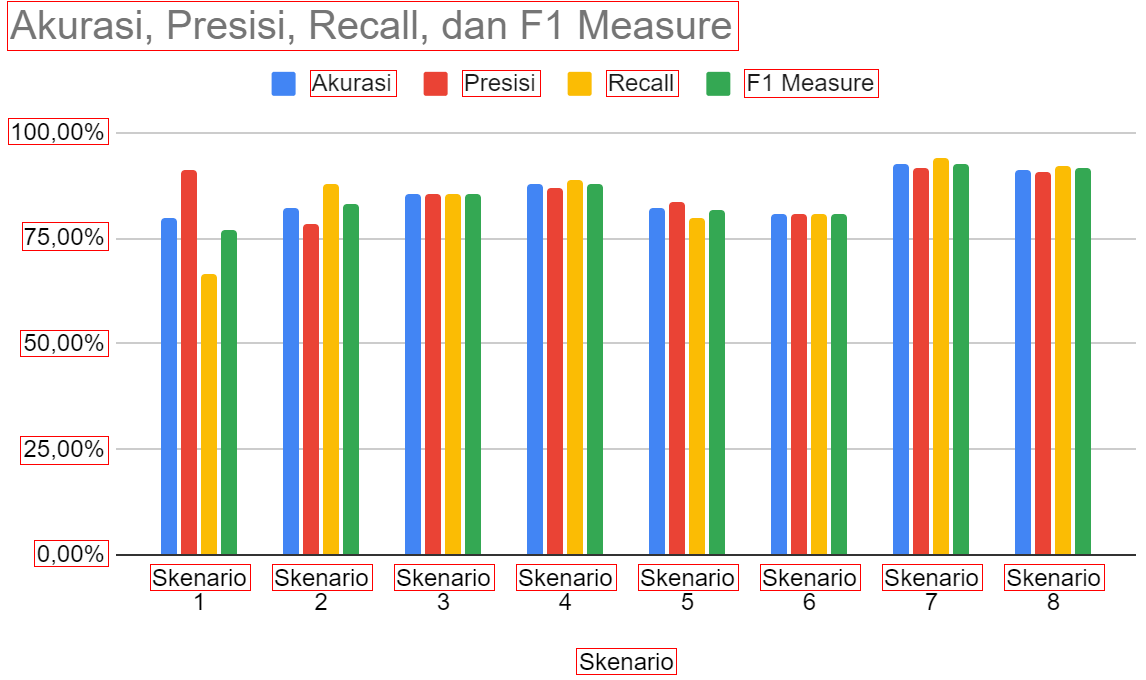

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import fitz
import easyocr
from PIL import Image, ImageChops, ImageDraw, ImageOps

# Setup variable
filename = 'input/input 2.pdf'
reader = easyocr.Reader(['id', 'en'], gpu=True)

with fitz.open(filename) as pdf:
    for index, page in enumerate(pdf):
        # Get image
        for xref in page.get_images(full=True):
            # Extract image
            pix = fitz.Pixmap(pdf, xref[0])
            img_rgb = Image.frombytes("RGB", (pix.width, pix.height), pix.samples)
            img = ImageOps.grayscale(img_rgb)

            # Trim image
            bg = Image.new(img.mode, img.size, (255))
            diff = ImageChops.difference(img, bg)
            diff = ImageChops.add(diff, diff, 2.0, -100)
            bbox = diff.getbbox()
            if bbox:
                img = img.crop(bbox)
                img_rgb = img_rgb.crop(bbox)

            # Expand image
            img = ImageOps.expand(img, border=10, fill='white')
            img_rgb = ImageOps.expand(img_rgb, border=10, fill='white')

            # Find the bounding box of those pixels
            result = reader.readtext(np.asarray(img))

            # Draw bounding box
            draw = ImageDraw.ImageDraw(img_rgb)
            total_area = 0
            for item in result:
                top_left = tuple(item[0][0])
                bottom_right = tuple(item[0][2])

                total_area += abs(bottom_right[0] - top_left[0]) * abs(bottom_right[1] - top_left[1])
                draw.rectangle((top_left, bottom_right), outline='red')

            # Display image
            print('Total area:', round(total_area / (img.width * img.height) * 100, 2), 'percent')
            display(img_rgb)

# Get Metadata

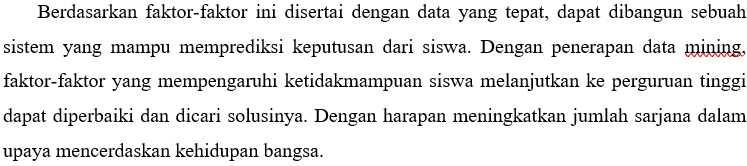

text 100 Gambar 1.1 Ikan Goreng 
Dataset dirancang secara artifisial menggunakan package sklearn pada python 
<re.Match object; span=(0, 10), match='Gambar 1.1'>


In [21]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import re
import fitz
import easyocr
from PIL import Image

# Setup variable
filename = 'input 3.pdf'
reader = easyocr.Reader(['id', 'en'], gpu=True)

# Open file
pdf = fitz.open(filename)

for index, page in enumerate(pdf):
    # Get page width and height
    page_width, page_height = page.mediabox_size

    images = page.get_images()
    xref = images[1]

    pix = fitz.Pixmap(pdf, xref[0])
    img = Image.frombytes("RGB", (pix.width, pix.height), pix.samples)

    display(img)

    image_rect = page.get_image_rects(xref[0])[0]
    clip_area = fitz.Rect(0, image_rect.y1, page_width, image_rect.y1 + 50)

    text_rect = page.search_for('Gambar', clip=clip_area)
    text = page.get_textbox(clip_area)

    print('text', len(text), text)

    pattern = r"^Gambar[ ]?\d+[.]?[\d]*"
    matches = re.search(pattern=pattern, string=text, flags=re.MULTILINE | re.IGNORECASE)
    print(matches)
    break
pdf.close()

# Redis

In [25]:
import redis

r = redis.Redis(host="localhost", port=6379, db=0)
r.hmset('test', {'filename': 'input.pdf'})

C:\Users\myxzlpltk\AppData\Local\Temp\ipykernel_63188\3628074739.py:4: DeprecationWarning: Redis.hmset() is deprecated. Use Redis.hset() instead.
  r.hmset('test', {'filename': 'input.pdf'})


True